# Unemployment Analysis

Reference 
- https://thecleverprogrammer.com/2021/07/12/unemployment-analysis-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
unemployment_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/unemployment.csv")
unemployment_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
unemployment_data.isnull().sum()

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [4]:
unemployment_data.shape

(267, 9)

In [5]:
unemployment_data.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
unemployment_data['State'] = unemployment_data.Region
unemployment_data.drop(['Region'], axis=1, inplace=True)
unemployment_data.columns

Index(['Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'State'],
      dtype='object')

In [7]:
unemployment_data.columns = unemployment_data.columns.str.strip('(%)').str.strip('.1').str.strip().str.lower().str.replace(" ", "_")
unemployment_data.columns

Index(['date', 'frequency', 'estimated_unemployment_rate',
       'estimated_employed', 'estimated_labour_participation_rate', 'region',
       'longitude', 'latitude', 'state'],
      dtype='object')

In [8]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 267 non-null    object 
 1   frequency                            267 non-null    object 
 2   estimated_unemployment_rate          267 non-null    float64
 3   estimated_employed                   267 non-null    int64  
 4   estimated_labour_participation_rate  267 non-null    float64
 5   region                               267 non-null    object 
 6   longitude                            267 non-null    float64
 7   latitude                             267 non-null    float64
 8   state                                267 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


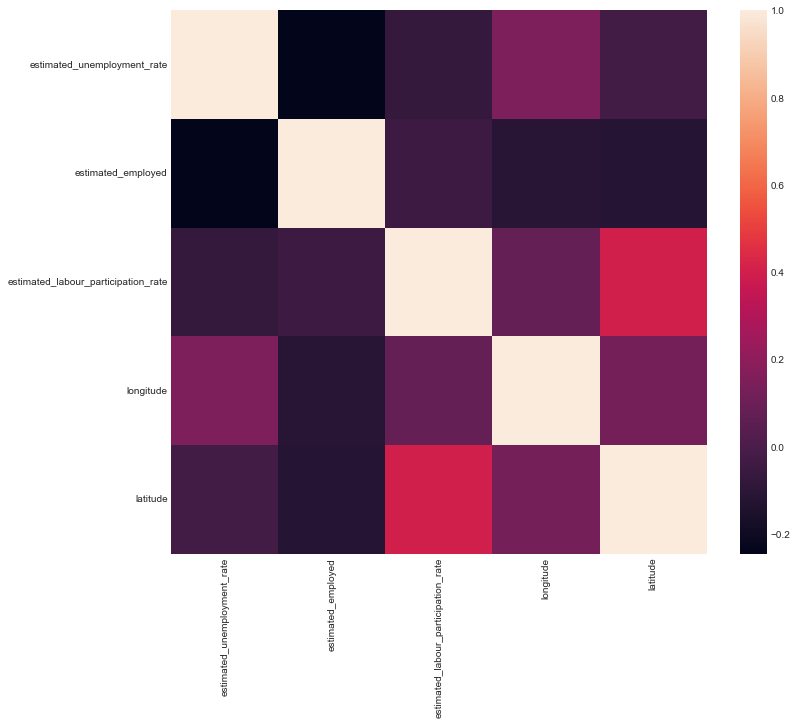

In [9]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(unemployment_data.corr())
plt.show()


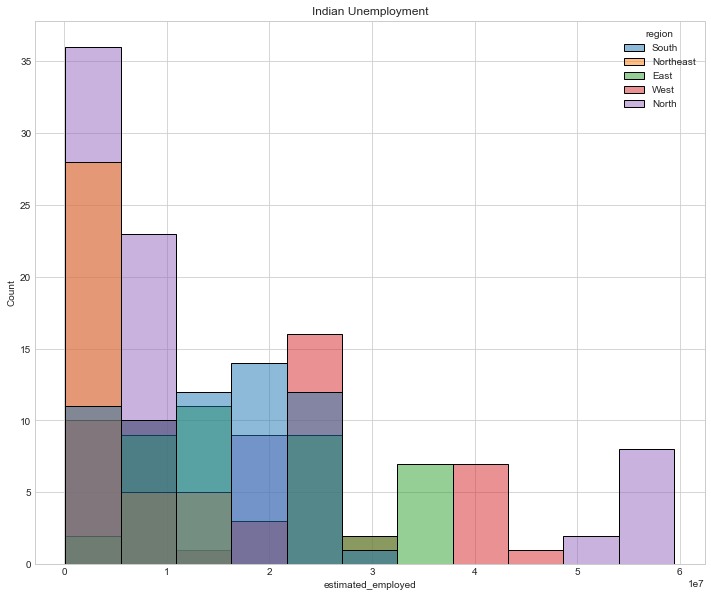

In [10]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x='estimated_employed', hue='region', data=unemployment_data)
plt.show()

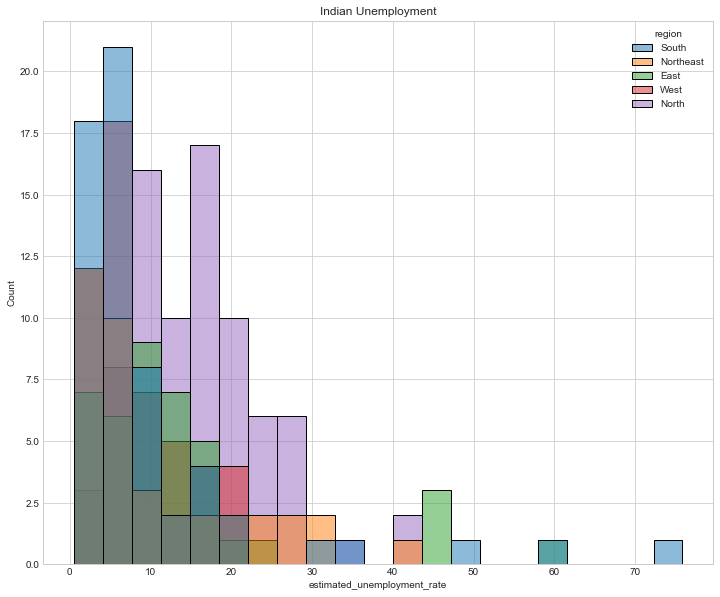

In [11]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x='estimated_unemployment_rate', hue='region', data=unemployment_data)
plt.show()

### Unemployment rate of each Indian state by region

In [12]:
unemployment = unemployment_data[['state', 'region', 'estimated_unemployment_rate']]
figure = px.sunburst(unemployment, path=['region', 'state'],
                                    values='estimated_unemployment_rate',
                                    width=700, height=700,
                                    color_continuous_scale='RdY1Gn',
                                    title='Unemployment Rate in India')
figure.show()
